<a href="https://colab.research.google.com/github/Kokkini/Imitation-RL-with-visual-input/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Stable Baselines only supports tensorflow 1.x for now
%tensorflow_version 1.x
!pip install stable-baselines[mpi]==2.10.0
!pip install gym

TensorFlow is already loaded. Please restart the runtime to change versions.
     |████████████████████████████████| 1.4MB 2.8MB/s 
  Created wheel for mpi4py: filename=mpi4py-3.0.3-cp36-cp36m-linux_x86_64.whl size=2074479 sha256=a56b03d0b314159c365c4b8fe5db96a75c77d0b6fdf3c6d8666f3bcabcd0f5a2
  Stored in directory: /root/.cache/pip/wheels/18/e0/86/2b713dd512199096012ceca61429e12b960888de59818871d6
Successfully built mpi4py


In [1]:
from getpass import getpass

def clone_with_token(repo_name, owner_name="Kokkini", user_email="trannhatquang1104@gmail.com", user_name="Kokkini"):
  GIT_TOKEN = getpass('insert token: ')
  GIT_PATH = f"https://{GIT_TOKEN}@github.com/{owner_name}/{repo_name}.git"
  !git config --global user.email "{user_email}"
  !git config --global user.name "{user_name}"
  !git clone "{GIT_PATH}"
  GIT_TOKEN, GIT_PATH = "", ""
clone_with_token("Imitation-RL-with-visual-input")

insert token: ··········
Cloning into 'Imitation-RL-with-visual-input'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 11 (delta 2), reused 7 (delta 1), pack-reused 0
Unpacking objects: 100% (11/11), done.


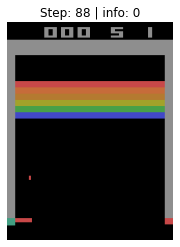

reward: 0, score: 0
[(0, 'NOOP'), (1, 'FIRE'), (2, 'RIGHT'), (3, 'LEFT')]


KeyboardInterrupt: ignored

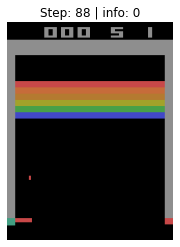

In [3]:
%matplotlib inline
import sys
sys.path.insert(1, "/content/Imitation-RL-with-visual-input")
from collect_expert_trajectory import *
log_dir = "/content/drive/My Drive/Colab Notebooks/imitation_RL"
env_name = "BreakoutNoFrameskip-v4"
env = gym.make(env_name)
env = wrap_deepmind(env)
num_trajectories = 1
trajectories = get_trajectories_notebook(env, num_trajectories, get_human_act)
print(f"average reward: {np.mean([sum(traj['rew']) for traj in trajectories])}")
print()

trajectory_file = os.path.join(log_dir, f"{env_name}_expert.pkl")
with open(trajectory_file, "wb") as f:
    pickle.dump(trajectories, f)

In [4]:
%cd Imitation-RL-with-visual-input

/content/Imitation-RL-with-visual-input


In [5]:
!git add .
!git commit -m "add atari experience collector"

[master 12a0cf7] add atari experience collector
 1 file changed, 53 insertions(+), 4 deletions(-)


In [6]:
!git push origin master

Counting objects: 3, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 1.29 KiB | 1.29 MiB/s, done.
Total 3 (delta 1), reused 0 (delta 0)
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/Kokkini/Imitation-RL-with-visual-input.git
   948c8a3..12a0cf7  master -> master
